# Leo Messi: *his  performance  through  data*
<br>
The final analysis is done over the two tournaments he most plays:

<a href=#1> La Liga </a>
<br>
<a href=#2> The Champions League </a>

The dataset is available [here](https://data.world/datatouille/lionel-messi). <br>
It is made in ***R***

<img src="https://arc-anglerfish-arc2-prod-elcomercio.s3.amazonaws.com/public/Z3UBNWSKEJAH3MFV7NKWSGS2XE.jpg" width="1000" height="400"/>






In [1]:
data = read.csv('Lionel Messi Goals.csv',sep=';',stringsAsFactors = FALSE,na.strings = "")
head(data)

Date,Competition.Name,Home.team,Opponent,Away.team,Minute,Score.Home.Team...When.Messi.Scored,Score.Away.Team...When.Messi.Scored,Goal.Type,Goal.Method,Final.Game.Result
samedi 16 février 2019,Liga,FC Barcelona,Real Valladolid,Real Valladolid,43,1,0,Penalty,Left foot,Won
dimanche 13 janvier 2019,Liga,FC Barcelona,Eibar,Eibar,53,2,0,Field goal,Left foot,Won
samedi 22 décembre 2018,Liga,FC Barcelona,Celta de Vigo,Celta de Vigo,45,2,0,Field goal,Left foot,Won
samedi 20 octobre 2018,Liga,FC Barcelona,Sevilla,Sevilla,12,2,0,Field goal,Left foot,Won
dimanche 23 septembre 2018,Liga,FC Barcelona,Girona,Girona,19,1,0,Field goal,Left foot,Draw
samedi 18 août 2018,Liga,FC Barcelona,Alavés,Alavés,90+2,3,0,Field goal,Left foot,Won


In [2]:
str(data)

'data.frame':	651 obs. of  11 variables:
 $ Date                               : chr  "samedi 16 février 2019" "dimanche 13 janvier 2019" "samedi 22 décembre 2018" "samedi 20 octobre 2018" ...
 $ Competition.Name                   : chr  "Liga" "Liga" "Liga" "Liga" ...
 $ Home.team                          : chr  "FC Barcelona" "FC Barcelona" "FC Barcelona" "FC Barcelona" ...
 $ Opponent                           : chr  "Real Valladolid" "Eibar" "Celta de Vigo" "Sevilla" ...
 $ Away.team                          : chr  "Real Valladolid" "Eibar" "Celta de Vigo" "Sevilla" ...
 $ Minute                             : chr  "43" "53" "45" "12" ...
 $ Score.Home.Team...When.Messi.Scored: int  1 2 2 2 1 3 1 3 2 1 ...
 $ Score.Away.Team...When.Messi.Scored: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Goal.Type                          : chr  "Penalty" "Field goal" "Field goal" "Field goal" ...
 $ Goal.Method                        : chr  "Left foot" "Left foot" "Left foot" "Left foot" ...
 $ Final.Game.Res

Number of instances and attributes:

In [3]:
dim(data)

[1] 651  11

In [4]:
colnames(data)[7:8] <- c('Score.Home.Team','Score.Away.Team')
colnames(data)

[1] "Date"              "Competition.Name"  "Home.team"        
 [4] "Opponent"          "Away.team"         "Minute"           
 [7] "Score.Home.Team"   "Score.Away.Team"   "Goal.Type"        
[10] "Goal.Method"       "Final.Game.Result"

Asking whether there are NA values:

In [5]:
attrs <- colnames(data)
for(attr in attrs) { sentence <-any(is.na(data[attr]))
                     print(paste(attr,':',sentence))}

[1] "Date : FALSE"
[1] "Competition.Name : TRUE"
[1] "Home.team : FALSE"
[1] "Opponent : FALSE"
[1] "Away.team : FALSE"
[1] "Minute : FALSE"
[1] "Score.Home.Team : FALSE"
[1] "Score.Away.Team : FALSE"
[1] "Goal.Type : TRUE"
[1] "Goal.Method : FALSE"
[1] "Final.Game.Result : FALSE"


Selecting day of the week, number of day, month and year:

In [6]:
library(stringr)

In [7]:
data$Date<- str_split(data$Date,' ')

In [8]:
day <- list()
n_day <- list()
month <- list()
year <- list()
for(index in 1:dim(data)[1]){day[index] <- data$Date[[index]][1]
                             n_day[index] <- data$Date[[index]][2] 
                             month[index] <- data$Date[[index]][3]
                             year[index] <- data$Date[[index]][4]}
data$day <- unlist(day)
data$n_day <- unlist(n_day)
data$month <- unlist(month)
data$year <- unlist(year)

In [9]:
data$Date <- NULL

Translating *days* and *months* into English

In [10]:
unique_days <-unique(data$day)
unique_months <-unique(data$month)
days <- c('Saturday','Sunday','Wednesday','Thuesday','Monday','Thursday','Friday')
month <- c('February','January','December','October','September','August','May','April','March',
           'November','June','July')
for(index in 1:dim(data)[1]){index_day <- which(data$day[index]==unique_days)
                             data$day[index] <- days[index_day]
                             index_month <- which(data$month[index]==unique_months)
                             data$month[index]<- month[index_month]}

Editing additional minutes 

In [11]:
indexes_plus <-str_which(data$Minute,'[+]')
minutes_edited <- str_split(data$Minute[indexes_plus],'[+]')
for(i in 1:length(minutes_edited)){min <- as.numeric(minutes_edited[[i]][1])
                                   add <- as.numeric(minutes_edited[[i]][2])
                                   minutes_edited[i] <- min + add}
minutes_edited <- unlist(minutes_edited)

In [12]:
data$Minute[indexes_plus]<- minutes_edited
data$Minute <- as.numeric(data$Minute)

In [13]:
head(data)

Competition.Name,Home.team,Opponent,Away.team,Minute,Score.Home.Team,Score.Away.Team,Goal.Type,Goal.Method,Final.Game.Result,day,n_day,month,year
Liga,FC Barcelona,Real Valladolid,Real Valladolid,43,1,0,Penalty,Left foot,Won,Saturday,16,February,2019
Liga,FC Barcelona,Eibar,Eibar,53,2,0,Field goal,Left foot,Won,Sunday,13,January,2019
Liga,FC Barcelona,Celta de Vigo,Celta de Vigo,45,2,0,Field goal,Left foot,Won,Saturday,22,December,2018
Liga,FC Barcelona,Sevilla,Sevilla,12,2,0,Field goal,Left foot,Won,Saturday,20,October,2018
Liga,FC Barcelona,Girona,Girona,19,1,0,Field goal,Left foot,Draw,Sunday,23,September,2018
Liga,FC Barcelona,Alavés,Alavés,92,3,0,Field goal,Left foot,Won,Saturday,18,August,2018


Packages:

In [15]:
library(dplyr)#to tranformate data
library(ggplot2)#to get elegant graphs
library(ggthemes)#to add extra backgrounds
library(extrafont)# to add more types of fonts
#font_import()
#loadfonts(device = "win")
library(party)# to apply decision trees
library(repr)

# Goals by competition

In [16]:
competition<-table(data$Competition.Name,exclude = NULL)
rownames(competition)[5] <- 'Unknown'
df_competition <- data.frame(competition)
colnames(df_competition) <- c('Competition','Goals')
df_competition = arrange(df_competition,desc(Competition))
df_competition$porcentage <- round(df_competition$Goals*100/sum(df_competition$Goals))
df_competition$position = cumsum(df_competition$porcentage) - df_competition$porcentage/2
df_competition$label <- paste(df_competition$porcentage,"%")

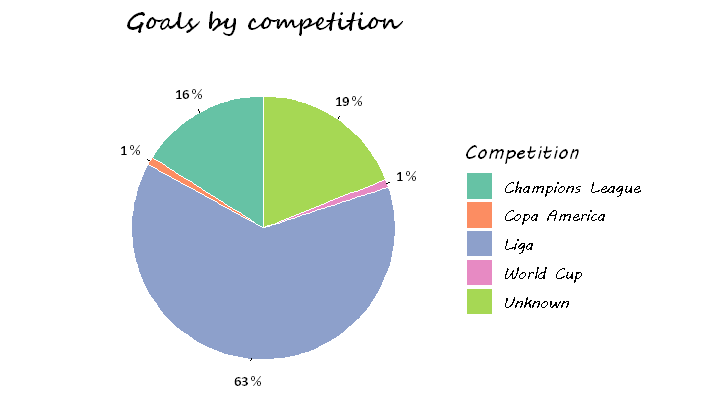

In [17]:
options(repr.plot.width=6,repr.plot.height=3.5)
ggplot(df_competition) + geom_bar(aes(x="",y=porcentage,fill=Competition),col='white',stat ="identity") +
coord_polar(theta='y',start=0) + theme_void() + ggtitle('Goals by competition') + 
theme(plot.title= element_text(hjust = 0.5,face = 'bold',family='Segoe Script'),
      text=element_text(size=12,family='MV Boli')) +
geom_text(aes(x=1.6,y = position , label = label), col='black',size=3.2,fontface =2,family='Calibri') +
geom_segment(aes(x = 1.445, y = position, xend = 1.47, yend = position)) +
scale_fill_brewer(palette='Set2')

# Goals per year

In [18]:
years <- table(data$year)
df_years <- data.frame(years)
colnames(df_years) <- c('Year','Goals')

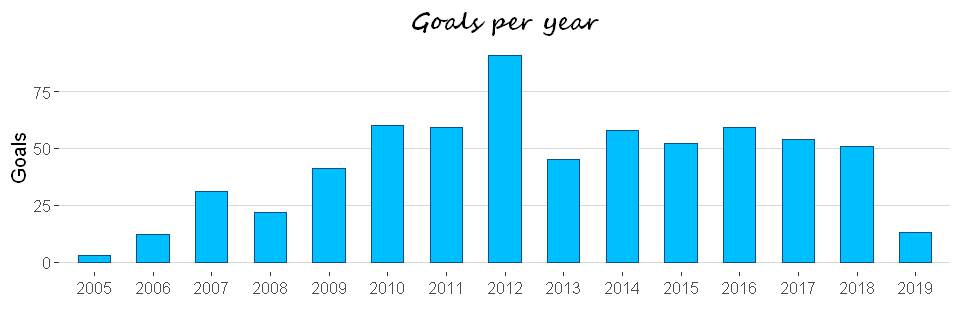

In [19]:
options(repr.plot.width=8,repr.plot.height=2.75)
ggplot(df_years) + geom_bar(aes(x=Year,y=Goals),stat = 'identity',fill= 'deepskyblue',col='dodgerblue4',width=.55) +
theme(plot.title= element_text(hjust = 0.5,face = 'bold',family = 'Segoe Script')) +
labs(title='Goals per year',x='') + theme_hc()

- The high performance of Messi has been since 2009
- His top level was in 2012

<div id="1">       </div>

# Performance in La Liga
![](http://7sport.cz/wp-content/uploads/2017/10/La-Liga_2017-2018-program-a-rozpis-zapasu.png)
<br>
<br>
Seeing as the all clubs that appear whose competition name is `Unknown` correspond to the spanish first division (*La Liga*). Therefore I'm including those data with the data corresponding to `Liga`.    

In [20]:
liga <- filter(data,Competition.Name == 'Liga' | Competition.Name == 'Unknown')

In [21]:
head(liga)

Competition.Name,Home.team,Opponent,Away.team,Minute,Score.Home.Team,Score.Away.Team,Goal.Type,Goal.Method,Final.Game.Result,day,n_day,month,year
Liga,FC Barcelona,Real Valladolid,Real Valladolid,43,1,0,Penalty,Left foot,Won,Saturday,16,February,2019
Liga,FC Barcelona,Eibar,Eibar,53,2,0,Field goal,Left foot,Won,Sunday,13,January,2019
Liga,FC Barcelona,Celta de Vigo,Celta de Vigo,45,2,0,Field goal,Left foot,Won,Saturday,22,December,2018
Liga,FC Barcelona,Sevilla,Sevilla,12,2,0,Field goal,Left foot,Won,Saturday,20,October,2018
Liga,FC Barcelona,Girona,Girona,19,1,0,Field goal,Left foot,Draw,Sunday,23,September,2018
Liga,FC Barcelona,Alavés,Alavés,92,3,0,Field goal,Left foot,Won,Saturday,18,August,2018


### Goals scored to clubs 

In [22]:
clubs_laliga <- data.frame(sort(table(liga$Opponent),decreasing = T))
colnames(clubs_laliga) <- c('Club','Goals')

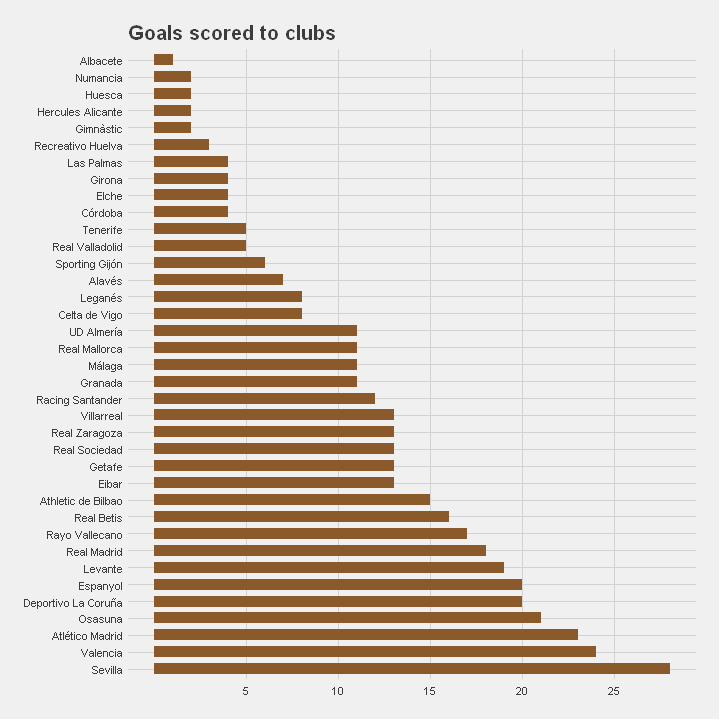

In [23]:
options(repr.plot.width=6,repr.plot.height=6)
ggplot(data=clubs_laliga) + geom_bar(aes(x=Club,y=Goals),stat='identity',fill='tan4',width=0.65) + 
scale_y_continuous(breaks=seq(5,25,5)) + coord_flip() + 
ggtitle('Goals scored to clubs') + theme_fivethirtyeight(base_size = 8)

### Number of goals per match

In [24]:
groupingn_goals <- group_by(liga,year,month,n_day,Opponent)
n_goals <- summarise(groupingn_goals,Goals=length(Final.Game.Result))
n_goals_df <- data.frame(table(n_goals$Goals))
colnames(n_goals_df) <- c('N_goals','N_matchs')

`summarise()` regrouping output by 'year', 'month', 'n_day' (override with `.groups` argument)


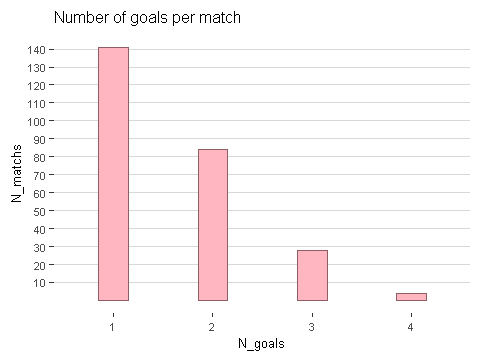

In [25]:
options(repr.plot.width=4,repr.plot.height=3)
ggplot(n_goals_df)+ geom_bar(aes(x=N_goals,y=N_matchs),stat ='identity',
                              fill='lightpink',colour='lightpink4',width = 0.3) +
scale_y_continuous(breaks=seq(10,150,10)) + ggtitle('Number of goals per match') + 
theme_hc(base_size = 8)

### Number of matchs a club received three or more goals 

In [26]:
clubs <- filter(n_goals,Goals>=3)
clubs_df <- data.frame(sort(table(clubs$Opponent),decreasing=T))
colnames(clubs_df)<- c('Club','N_times')

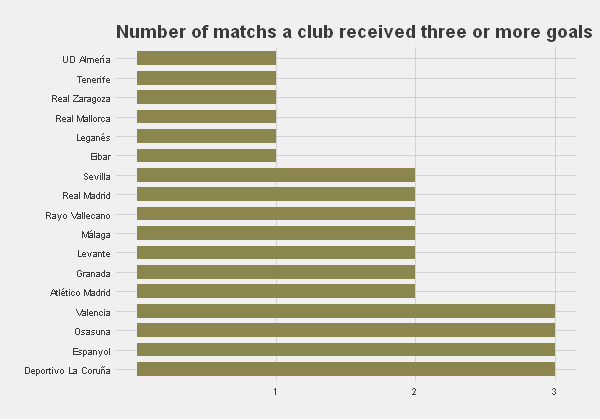

In [27]:
options(repr.plot.width=5,repr.plot.height=3.5)
ggplot(data=clubs_df) + geom_bar(aes(x=Club,y=N_times),stat='identity',fill='khaki4',width=.7) + 
scale_y_continuous(breaks=seq(1,3,1)) + coord_flip() + 
ggtitle('Number of matchs a club received three or more goals') + 
theme_fivethirtyeight(base_size = 7)

### Goals per minute

In [28]:
minutes_laliga <- data.frame(sort(table(liga$Minute),decreasing = T))
colnames(minutes_laliga)<- c('Minute','Goals')

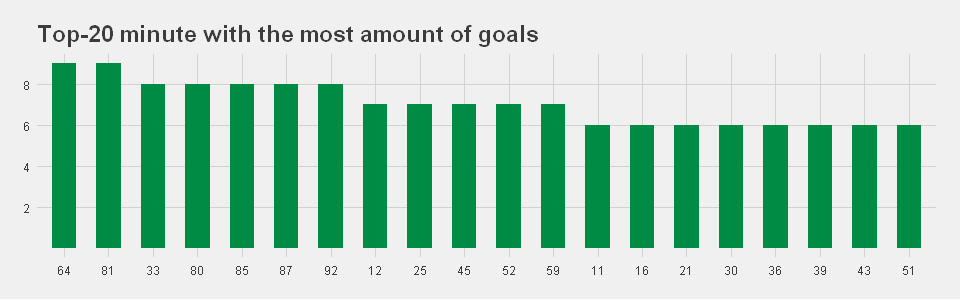

In [29]:
options(repr.plot.width=8,repr.plot.height=2.5)
ggplot(data=minutes_laliga[1:20,]) + geom_bar(aes(x=Minute,y=Goals),stat='identity',fill='springgreen4',width=0.55) + 
scale_y_continuous(breaks=seq(2,10,2)) + labs(title='Top-20 minute with the most amount of goals') + 
theme_fivethirtyeight(base_size = 9)

### Non goal minute

In [30]:
non_goal_minutes <- list()
index <- 1
for (min in 1:90){if(!min %in% liga$Minute){non_goal_minutes[index]<- min
                                            index <- index +1 }
                 } 
non_goal_minutes

[[1]]
[1] 1

[[2]]
[1] 2

[[3]]
[1] 34

[[4]]
[1] 69

### Goals per period of play
Goals in the first, second half and in additional time 

In [31]:
period <- rep(0,3)
for (min in liga$Minute){if(min<45){ period[1] <- period[1]+1} 
                         else {if(89 < min){period[3]<- period[3]+1}
                               else {period[2]<- period[2]+1} } 
                        }  
goals_period <- data.frame('Period'=c('first half','second half','additional time'),'Goals'=period)
goals_period = arrange(goals_period,desc(Period))
goals_period$porcentage <- round(goals_period$Goals*100/sum(goals_period$Goals))
goals_period$position = cumsum(goals_period$porcentage) - goals_period$porcentage/2
goals_period$label <- paste(goals_period$porcentage,"%")

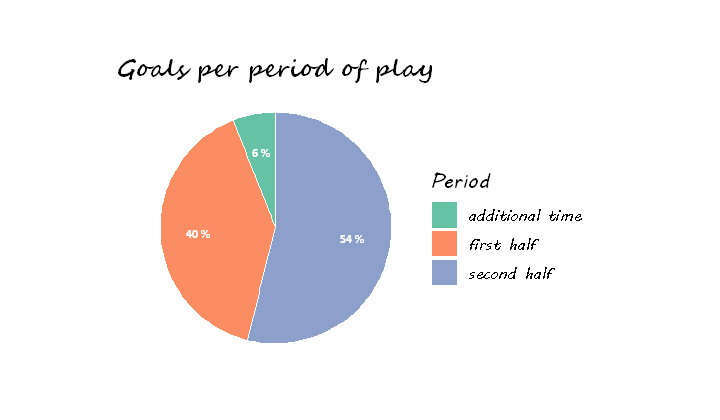

In [32]:
options(repr.plot.width=6,repr.plot.height=3.5)
ggplot(goals_period) + geom_bar(aes(x="",y=porcentage,fill=Period),col='white',stat = "identity") +
coord_polar(theta="y",start=0) + theme_void() + ggtitle('Goals per period of play') + 
theme(plot.title= element_text(hjust = 0.5,face = 'bold',family = 'Segoe Script'),
      plot.margin = margin(1,1,1,1, "cm"),text=element_text(size=12,family='MV Boli')) +
geom_text(aes(x=1.15,y = position , label = label), col='white',size=2.5,fontface =2,family='Calibri') +
scale_fill_brewer(palette="Set2")

### Goals per month

In [33]:
months <- table(liga$month)
df_months <- data.frame(months)
colnames(df_months) <- c('Month','Goals')
#Setting the hierarchy by sequence order
months_ord <- c('January','February','March','April','May','June','July','August','September','October',
                'November','December')
df_months$Month <- factor(df_months$Month,levels=months_ord)
df_months <- rbind(df_months,c('July','0'))
df_months$Goals <- as.numeric(df_months$Goals)

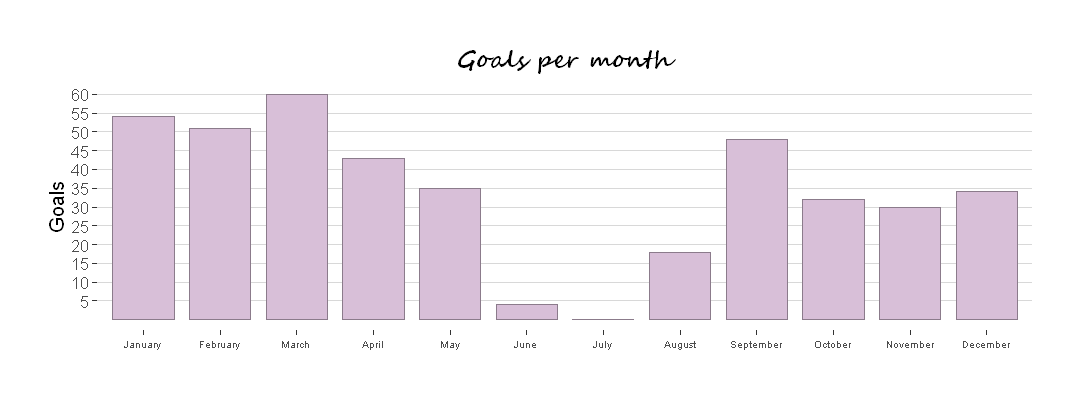

In [34]:
options(repr.plot.width=9,repr.plot.height=3.5)
ggplot(df_months)+ geom_bar(aes(x=Month,y=Goals),stat='identity',fill='thistle',colour='thistle4',width=0.8) + 
scale_y_continuous(breaks=seq(5,60,5))+ labs(x='',title='Goals per month') + theme_hc() +
theme(plot.title= element_text(hjust = 0.5,face = 'bold',family = 'Segoe Script'),
      plot.margin = margin(1,1,1,1, "cm"), axis.text.x=element_text(size=6))

## Goals per day of the week

In [35]:
days <- table(liga$day)
df_days <- data.frame(days)
colnames(df_days) <- c('Day','Goals')
#Setting the hierarchy by sequence order
days_ord <- c('Monday','Thuesday','Wednesday','Thursday','Friday','Saturday','Sunday')
df_days$Day <- factor(df_days$Day,levels=days_ord)
df_days <- rbind(df_days,c('Friday','0'))
df_days$Goals <- as.numeric(df_days$Goals)

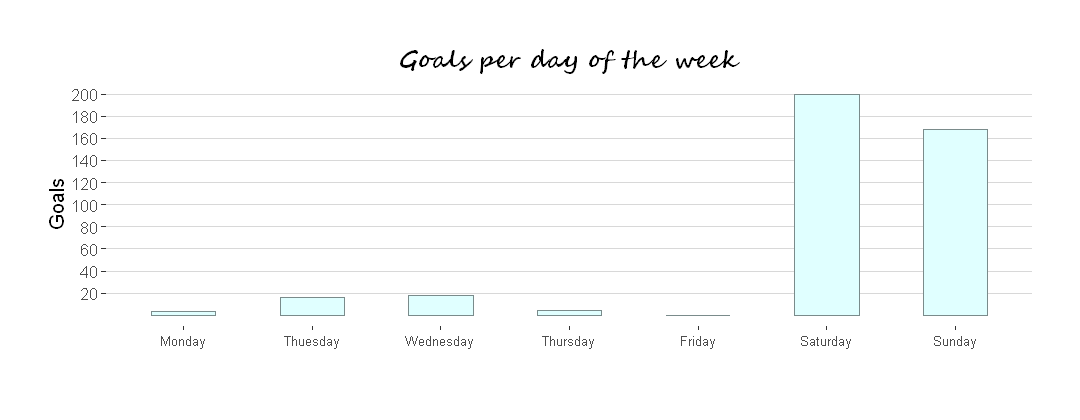

In [36]:
options(repr.plot.width=9,repr.plot.height=3.5)
ggplot(df_days)+ geom_bar(aes(x=Day,y=Goals),stat='identity',fill='lightcyan',colour='lightcyan4',width=0.5) + 
scale_y_continuous(breaks=seq(20,200,20))+ labs(x='',title='Goals per day of the week') + theme_hc() +
theme(plot.title= element_text(hjust = 0.5,face = 'bold',family = 'Segoe Script'),
      plot.margin = margin(1,1,1,1, "cm"), axis.text.x=element_text(size=8))

### Type of goal

In [37]:
type_goal <- table(liga$Goal.Type,exclude= NULL)
rownames(type_goal)[6] <- "Unknown"
type_goal <- data.frame(type_goal)
colnames(type_goal) <- c('Type_of_goal','Goals')
type_goal = arrange(type_goal,desc(Type_of_goal))
type_goal$porcentage <- round(type_goal$Goals*100/sum(type_goal$Goals))
type_goal$position = cumsum(type_goal$porcentage) - type_goal$porcentage/2
type_goal$label <- paste(type_goal$porcentage,"%")

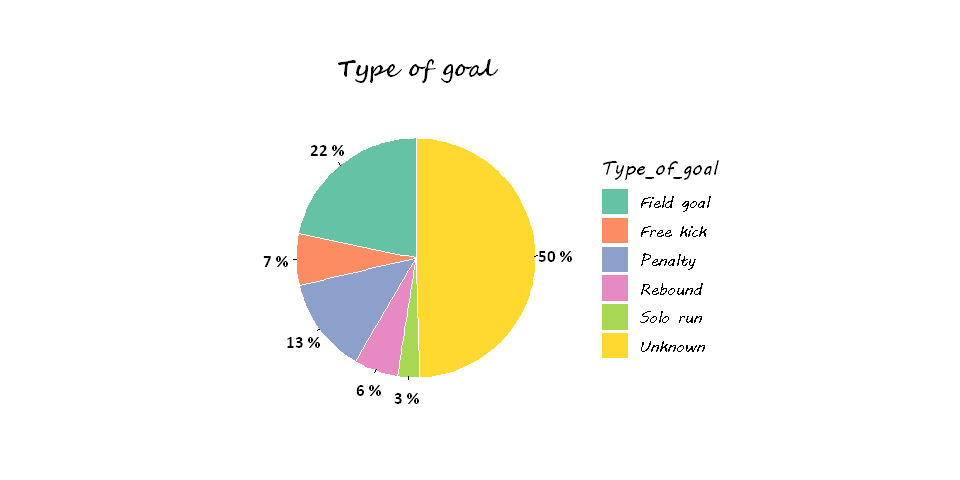

In [38]:
options(repr.plot.width=8,repr.plot.height=4)
ggplot(type_goal) + geom_bar(aes(x="",y=porcentage,fill=Type_of_goal),col='white',stat = "identity") +
coord_polar(theta="y",start=0) + theme_void() + ggtitle('Type of goal') + 
theme(plot.title= element_text(hjust = 0.5,face = 'bold',family = 'Segoe Script'),
      plot.margin = margin(1,1,1,1, "cm"),text=element_text(size=12,family='MV Boli')) +
geom_text(aes(x=1.6,y = position , label = label), col='black',size=3.5,fontface =2,family='Calibri') +
geom_segment(aes(x = 1.44, y = position, xend = 1.47, yend = position))+
scale_fill_brewer(palette="Set2")

### Global analysis

In [39]:
#Changing to factors
liga$Goal.Method <- as.factor(liga$Goal.Method)
liga$day<- as.factor(liga$day)
liga$month <- as.factor(liga$month)
liga$Final.Game.Result<- as.factor(liga$Final.Game.Result)

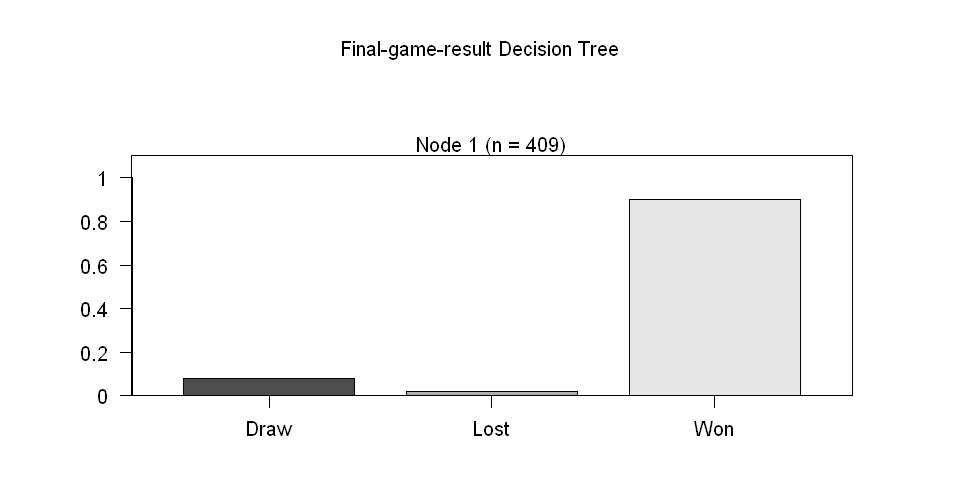

In [40]:
dataset <- liga[,c(5,9,10,11,13)]
tree <- ctree(Final.Game.Result ~.,data= dataset)
plot(tree, main= "Final-game-result Decision Tree")

- There is no a relationship between the victory of Barcelona F.C. and the rest of the attributes 
- His favourite day to score goals is on Saturdays
- He fells more comfortable scoring on second halfs

<div id="2"> </div>

## Performance in The Champions League
![](https://i.pinimg.com/736x/4e/e8/e9/4ee8e9139110201b6e17ac878d1250fd.jpg)

In [41]:
champion <- filter(data,Competition.Name == 'Champions League')

### Goals scored to clubs

In [42]:
clubs_lachampion <- data.frame(sort(table(champion$Opponent),decreasing = T))
colnames(clubs_lachampion) <- c('Club','Goals')

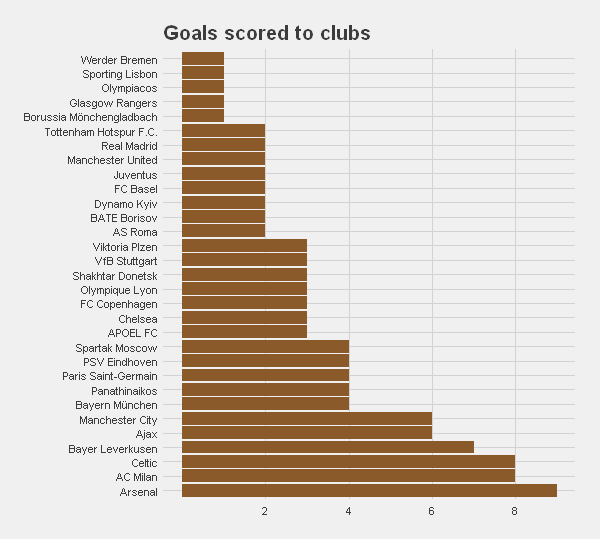

In [43]:
options(repr.plot.width=5,repr.plot.height=4.5)
ggplot(data=clubs_lachampion) + geom_bar(aes(x=Club,y=Goals),stat='identity',fill='tan4') + 
scale_y_continuous(breaks=seq(2,10,2)) + labs(title="Goals scored to clubs") + coord_flip() + 
theme_fivethirtyeight(base_size = 8)

### Number of goals per match

In [44]:
groupingn_goals <- group_by(champion,year,month,n_day,Opponent)
n_goals <- summarise(groupingn_goals,Goals=length(Final.Game.Result))
n_goals_df <- data.frame(table(n_goals$Goals))
colnames(n_goals_df) <- c('N_goals','N_matchs')

`summarise()` regrouping output by 'year', 'month', 'n_day' (override with `.groups` argument)


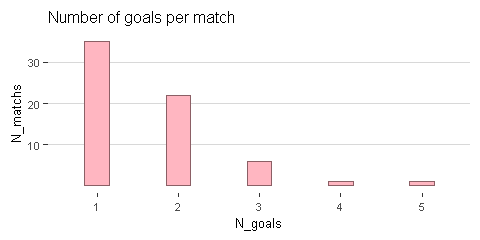

In [45]:
options(repr.plot.width=4,repr.plot.height=2)
ggplot(n_goals_df)+ geom_bar(aes(x=N_goals,y=N_matchs),stat = 'identity',fill='lightpink',
                             colour='lightpink4',width = 0.3) +
scale_y_continuous(breaks=seq(10,150,10)) +
ggtitle('Number of goals per match') + theme_hc(base_size = 8)

### Number of matchs a club received three or more goals 

In [46]:
clubs <- filter(n_goals,Goals>=3)
clubs_df <- data.frame(sort(table(clubs$Opponent),decreasing=T))
colnames(clubs_df)<- c('Club','N_times')

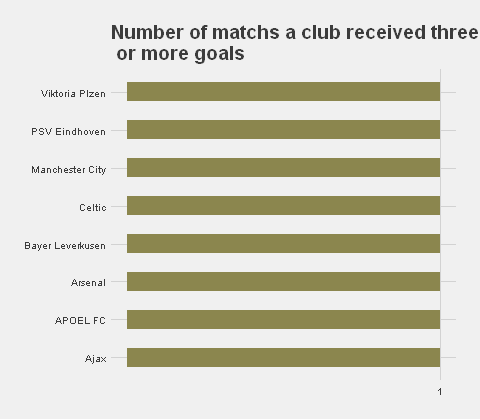

In [47]:
options(repr.plot.width=4,repr.plot.height=3.5)
ggplot(data=clubs_df) + geom_bar(aes(x=Club,y=N_times),stat='identity',fill='khaki4',width=0.5) + 
scale_y_continuous(breaks=seq(1,3,1)) + coord_flip() + 
ggtitle('Number of matchs a club received three\n or more goals') + 
theme_fivethirtyeight(base_size = 7.75)

### Goals per minute

In [48]:
minutes_lachampion <- data.frame(sort(table(champion$Minute),decreasing = T))
colnames(minutes_lachampion)<- c('Minute','Goals')

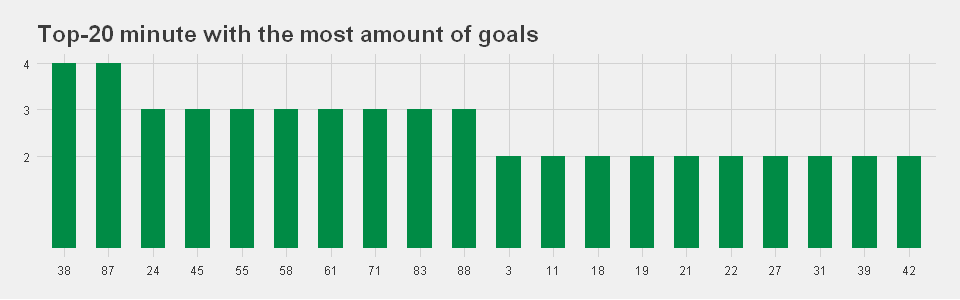

In [49]:
options(repr.plot.width=8,repr.plot.height=2.5)
ggplot(data=minutes_lachampion[1:20,]) + 
geom_bar(aes(x=Minute,y=Goals),stat='identity',fill='springgreen4',width=0.55) + 
scale_y_continuous(breaks=seq(2,4,1))+labs(title='Top-20 minute with the most amount of goals') + 
theme_fivethirtyeight(base_size = 9)

### Non-goal minutes

In [50]:
non_goal_minutes <- list()
index <- 1
for (min in 1:90){if(!min %in% champion$Minute){non_goal_minutes[index]<- min
                                                index <- index +1 }
                 } 
non_goal_minutes

[[1]]
[1] 1

[[2]]
[1] 2

[[3]]
[1] 6

[[4]]
[1] 7

[[5]]
[1] 8

[[6]]
[1] 10

[[7]]
[1] 12

[[8]]
[1] 14

[[9]]
[1] 15

[[10]]
[1] 28

[[11]]
[1] 29

[[12]]
[1] 33

[[13]]
[1] 35

[[14]]
[1] 44

[[15]]
[1] 46

[[16]]
[1] 47

[[17]]
[1] 51

[[18]]
[1] 52

[[19]]
[1] 53

[[20]]
[1] 57

[[21]]
[1] 64

[[22]]
[1] 65

[[23]]
[1] 66

[[24]]
[1] 68

[[25]]
[1] 72

[[26]]
[1] 73

[[27]]
[1] 74

[[28]]
[1] 78

[[29]]
[1] 81

[[30]]
[1] 82

[[31]]
[1] 85

### Goals per period of play
Goals in the first, second half and in additional time

In [51]:
period <- rep(0,3)
for (min in champion$Minute){if(min<45){ period[1] <- period[1]+1} 
                             else {if(89 < min){period[3]<- period[3]+1}
                                   else {period[2]<- period[2]+1} } 
                            }  
goals_period <- data.frame('Period'=c('first half','second half','additional time'),'Goals'=period)
goals_period = arrange(goals_period,desc(Period))
goals_period$porcentage <- round(goals_period$Goals*100/sum(goals_period$Goals))
goals_period$position = cumsum(goals_period$porcentage) - goals_period$porcentage/2
goals_period$label <- paste(goals_period$porcentage,"%")

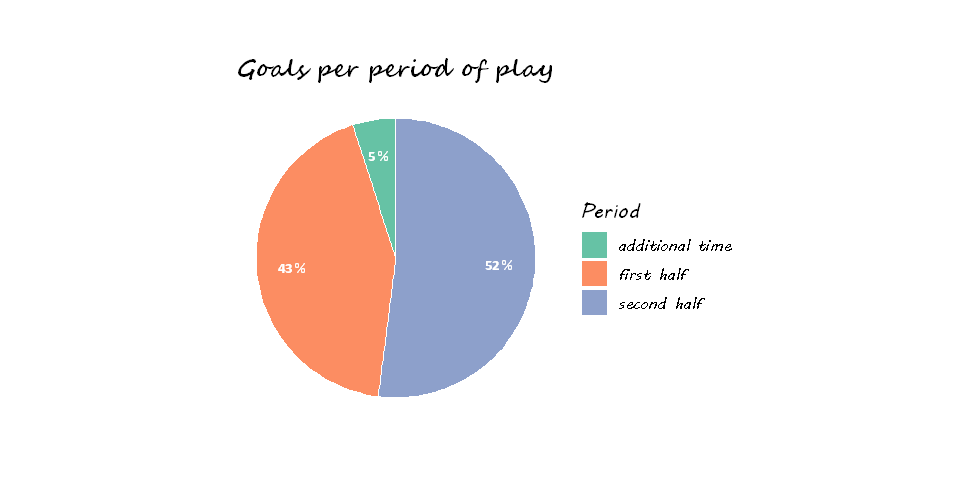

In [52]:
options(repr.plot.width=8,repr.plot.height=4)
ggplot(goals_period) + geom_bar(aes(x="",y=porcentage,fill=Period),col='white',stat = "identity") +
coord_polar(theta="y",start=0) + theme_void() + ggtitle('Goals per period of play') + 
theme(plot.title= element_text(hjust = 0.5,face = 'bold',family = 'Segoe Script'),
      plot.margin = margin(1,1,1,1, "cm"),text=element_text(size=12,family='MV Boli')) +
geom_text(aes(x=1.22,y = position , label = label), col='white',size=3.25,fontface =2,family='Calibri') +
scale_fill_brewer(palette="Set2")

### Goals per month

In [53]:
months <- table(champion$month)
df_months <- data.frame(months)
colnames(df_months) <- c('Month','Goals')
df_months$Month <- factor(df_months$Month,levels=months_ord)
df_months <- rbind(df_months,c('June','0'))
df_months <- rbind(df_months,c('July','0'))
df_months <- rbind(df_months,c('August','0'))
df_months$Goals <- as.numeric(df_months$Goals)

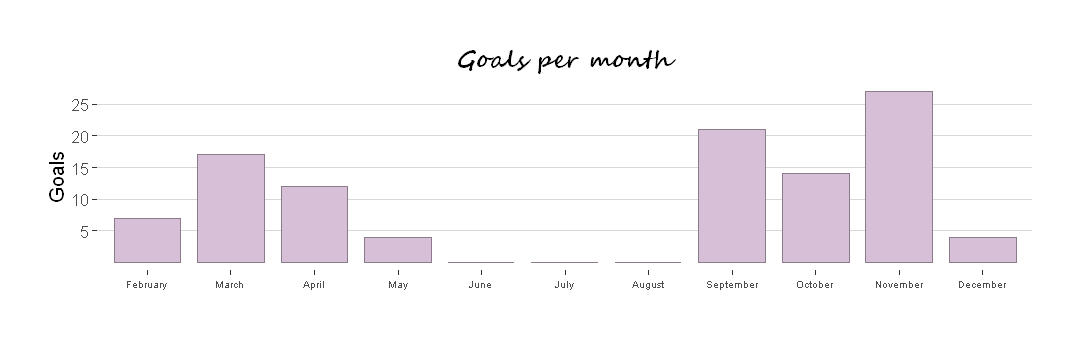

In [54]:
options(repr.plot.width=9,repr.plot.height=3)
ggplot(df_months)+ geom_bar(aes(x=Month,y=Goals),stat='identity',fill='thistle',colour='thistle4',width=0.8)+ 
scale_y_continuous(breaks=seq(5,30,5))+ labs(x='',title='Goals per month') + theme_hc() +
theme(plot.title= element_text(hjust = 0.5,face = 'bold',family = 'Segoe Script'),
      plot.margin = margin(1,1,1,1, "cm"),axis.text.x=element_text(size=6))

### Goals per day of the week

In [55]:
days <- table(champion$day)
df_days <- data.frame(days)
colnames(df_days) <- c('Day','Goals')
df_days$Day <- factor(df_days$Day,levels=days_ord)
df_days <- rbind(df_days,c('Monday','0'))
df_days <- rbind(df_days,c('Thursday','0'))
df_days <- rbind(df_days,c('Friday','0'))
df_days <- rbind(df_days,c('Sunday','0'))
df_days$Goals <- as.numeric(df_days$Goals)

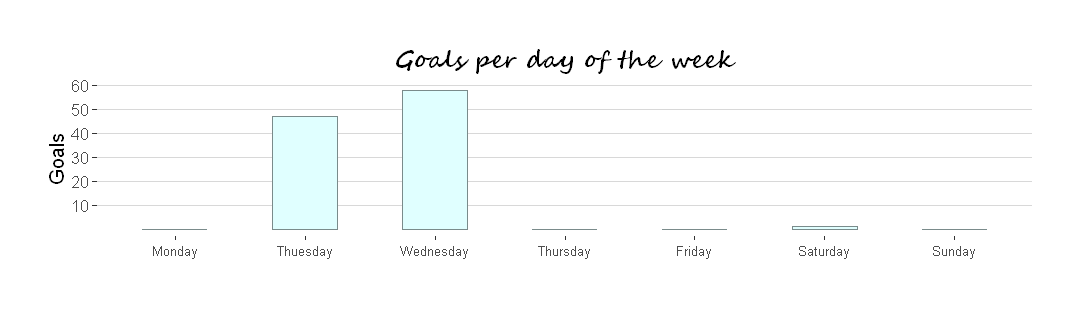

In [56]:
options(repr.plot.width=9,repr.plot.height=2.75)
ggplot(df_days)+ geom_bar(aes(x=Day,y=Goals),stat='identity',fill='lightcyan',colour='lightcyan4',width=0.5)+ 
scale_y_continuous(breaks=seq(10,60,10))+ 
labs(x='',title='Goals per day of the week') + theme_hc() +
theme(plot.title= element_text(hjust = 0.5,face = 'bold',family = 'Segoe Script'),
      plot.margin = margin(1,1,1,1, "cm"),axis.text.x=element_text(size=8))

### Type of goal

In [57]:
type_goal <- table(champion$Goal.Type,exclude= NULL)
rownames(type_goal)[6] <- "Unknown"
type_goal <- data.frame(type_goal)
colnames(type_goal) <- c('Type_of_goal','Goals')
type_goal = arrange(type_goal,desc(Type_of_goal))
type_goal$porcentage <- round(type_goal$Goals*100/sum(type_goal$Goals))
type_goal$position = cumsum(type_goal$porcentage) - type_goal$porcentage/2
type_goal$label <- paste(type_goal$porcentage,"%")

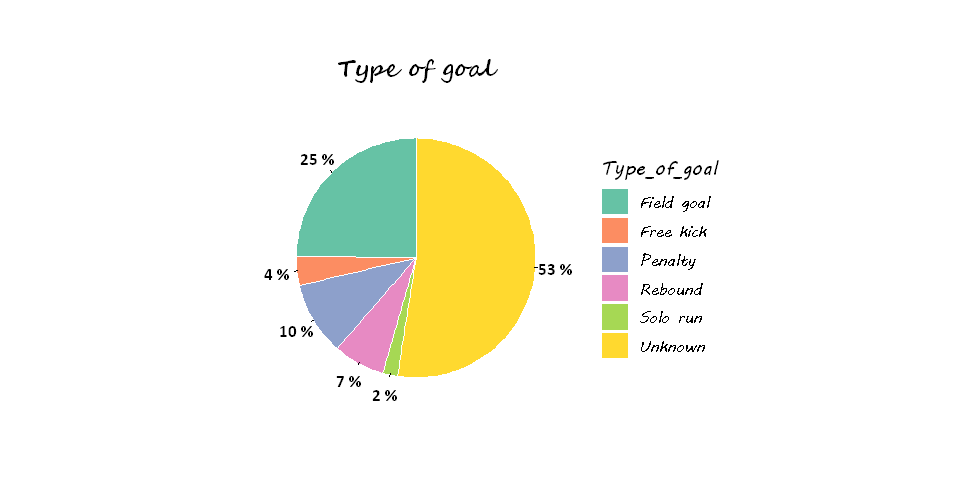

In [58]:
options(repr.plot.width=8,repr.plot.height=4)
ggplot(type_goal) + geom_bar(aes(x="",y=porcentage,fill=Type_of_goal),col='white',stat = "identity") +
coord_polar(theta="y",start=0) + theme_void() + ggtitle('Type of goal') + 
theme(plot.title= element_text(hjust = 0.5,face = 'bold',family = 'Segoe Script'),
      plot.margin = margin(1,1,1,1, "cm"),text=element_text(size=12,family='MV Boli')) +
geom_text(aes(x=1.6,y = position , label = label), col='black',size=3.5,fontface =2,family='Calibri') +
geom_segment(aes(x = 1.44, y = position, xend = 1.47, yend = position))+
scale_fill_brewer(palette="Set2")

### Global analysis

In [59]:
#Changing to factors
champion$Goal.Method <- as.factor(champion$Goal.Method)
champion$day<- as.factor(champion$day)
champion$month <- as.factor(champion$month)
champion$Final.Game.Result<- as.factor(champion$Final.Game.Result)

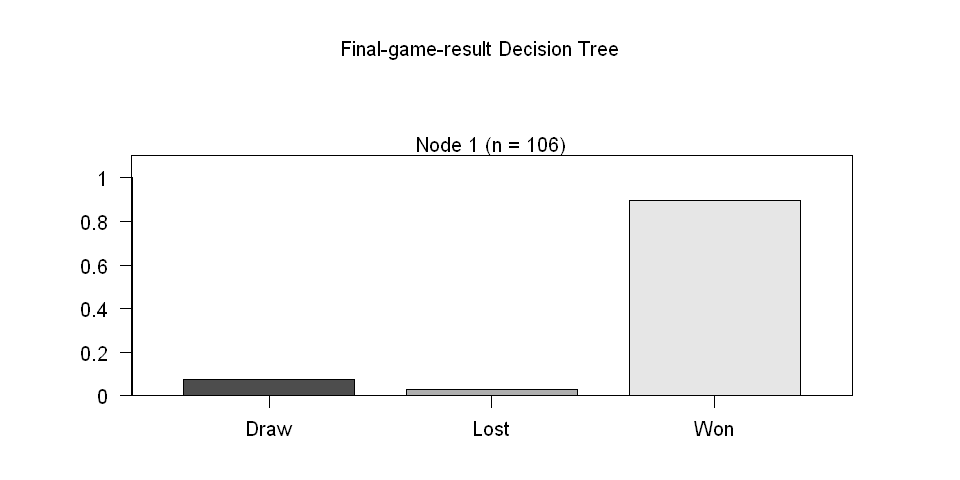

In [60]:
dataset <- champion[,c(5,9,10,11,13)]
tree <- ctree(Final.Game.Result ~.,data= dataset)
plot(tree, main= "Final-game-result Decision Tree")

- On the same way regarding La Liga competition, there in no a relationship between the victory of Messi's team and the rest of the attributes.
- There in no a clear dependency on scoring goals by the half of play